In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("nlp-getting-started/train.csv", encoding="utf-8")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [3]:
train_data.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [4]:
train_data.describe(include=np.object_)

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


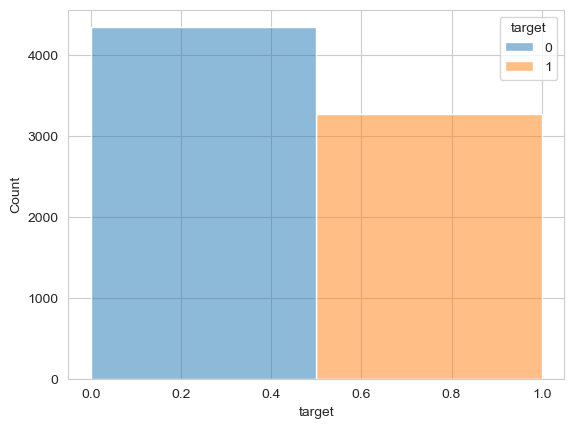

In [36]:
sns.set_style("whitegrid")

sns.histplot(train_data, x="target", bins=[0, 0.5, 1], hue="target")
plt.show()

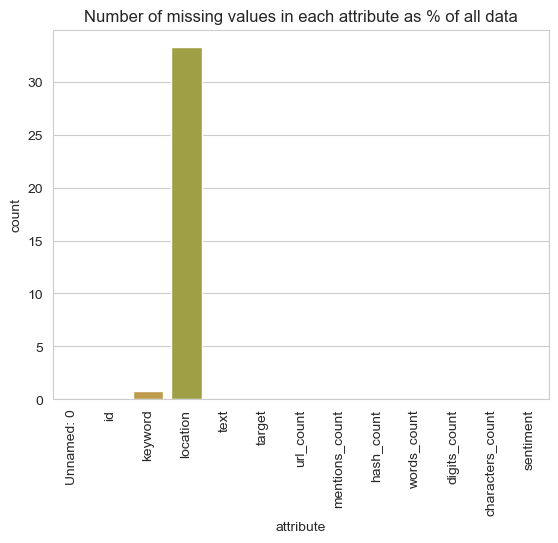

In [33]:
missing = train_data.isnull().sum() / train_data.shape[0] * 100
missing = pd.DataFrame(np.c_[missing, train_data.columns], columns=["count", "attribute"])

sns.set_style("whitegrid")
g = sns.barplot(missing, x="attribute", y="count")
g.tick_params("x", rotation=90)
plt.title("Number of missing values in each attribute as % of all data")
plt.show()

In [5]:
train_data["location"].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [6]:
train_data["text"].value_counts()

11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...        10
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam                      6
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'                               6
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_     6
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives                                                                                  5
                                                                                                                                                ..
Escape The Heat (and the #ORShow) for a trail run on Desolation Loop you'll be glad you did http://t.co/n2ucNzh38P htt

In [7]:
# random 5 tweets 
train_data["text"].sample(5, random_state=1234)

5953         @camilacabello97 NOW IM INTERNALLY SCREAMING
692     S3XLEAK!!!\nPh0tos of 19yrs old Ash@wo lady in...
6342    NTSB: Virgin Galactic's SpaceshipTwo crash due...
1019    Micom 2015 Summer Contrast Candy Color Bowknot...
5254    SYD traffic HAZARD Oil spill - BANKSTOWN Stace...
Name: text, dtype: object

In [8]:
import re

def get_url_num(text):
    return len(re.findall(r'(https?://[^\s]+)', text))

def get_hash_num(text):
    return len(re.findall(r"#[a-zA-Z0-9]+", text.lower()))

def get_mentions_num(text):
    return len(re.findall(r'@[A-Za-z0-9_]+', text))

def get_words_num(text):
    return len(re.findall(r'[A-Za-z_]+', text))

def get_digits_num(text):
    return sum(c.isdigit() for c in text)

def get_characters_num(text):
    return sum(c.isalpha() for c in text)

def encode_html(text):
    if not pd.isna(text):
        return re.sub(r"%20", " ", text)
    return text

def remove_trash(text):
    # text = re.sub(r"#[a-zA-Z0-9]+", "", text)
    text = re.sub(r"#", "", text)

    text = re.sub(r"@[A-Za-z0-9_]+", "", text)
    text = re.sub(r"\n", "", text)
    text = re.sub(r"[0-9]", "", text)
    text = re.sub(r'(https?://[^\s]+)', "", text)
    
    return text.lower()

In [9]:
train_data["url_count"] = train_data["text"].apply(get_url_num)
train_data["mentions_count"] = train_data["text"].apply(get_mentions_num)
train_data["hash_count"] = train_data["text"].apply(get_hash_num)
train_data["words_count"] = train_data["text"].apply(get_words_num)
train_data["digits_count"] = train_data["text"].apply(get_digits_num)
train_data["characters_count"] = train_data["text"].apply(get_characters_num)

train_data["text"] = train_data["text"].apply(remove_trash)
train_data["text"] = train_data["text"].apply(encode_html)


train_data["keyword"] = train_data["keyword"].apply(encode_html)

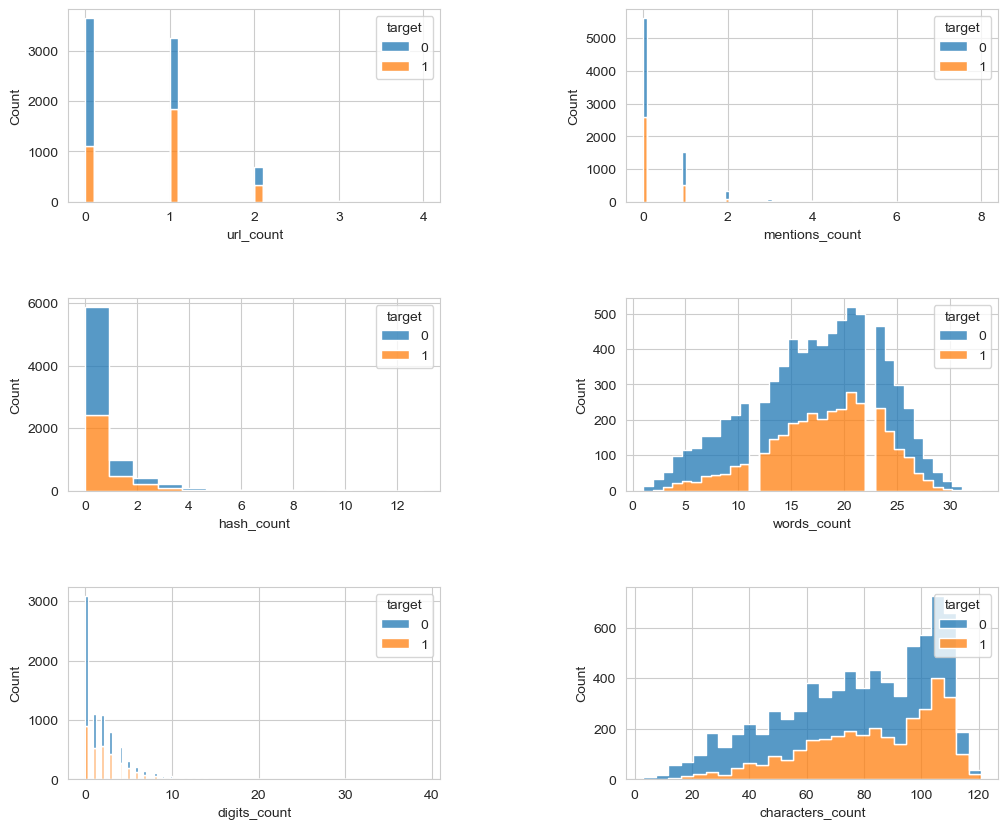

In [31]:
hists = [name for name in train_data.columns if name.endswith("_count")]

plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i, hist in enumerate(hists):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data=train_data, x=hist, hue="target", multiple="stack", element="step")

plt.show()

In [10]:
import geocoder
import spacy

nlp = spacy.load("en_core_web_sm")

/opt/homebrew/Caskroom/miniforge/base/envs/hackathon/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# for i, location in enumerate(train_data["location"]):
#     if not pd.isna(location):
#         gg = geocoder.osm(location)
        
#         try:
#             country = gg.osm["addr:country"]
#         except Exception:
#             code = "other"
#         else:
#             code = country

#         with open("counries.txt", "a") as f:
#             f.write(f"{i};{code}\n")
#         print(i, end="\r")

In [13]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

def get_sentiment(text):
    label = sentiment_pipeline(text)[0]
    return 1 if label["label"] == "POSITIVE" else 0

train_data["sentiment"] = train_data["text"].apply(get_sentiment)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
# from collections import Counter

# def keep_k_most_freq(text, k=5):
#     doc = nlp(text)
#     words = [token.lemma_ for token in doc if token.is_alpha]
#     word_freq = Counter(words)
#     return " ".join([ms[0].lower() for ms in word_freq.most_common(k)])

# train_data["text"] = train_data["text"].apply(keep_k_most_freq)

In [68]:
# keep only 50 most popular, rest mark as 'smaller_country'
countries = train_data["location"].value_counts()[:50].index

def keep_50(location):
    if location in countries:
        return location
    return "smaller_country"

train_data["location"] = train_data["location"].map(keep_50)

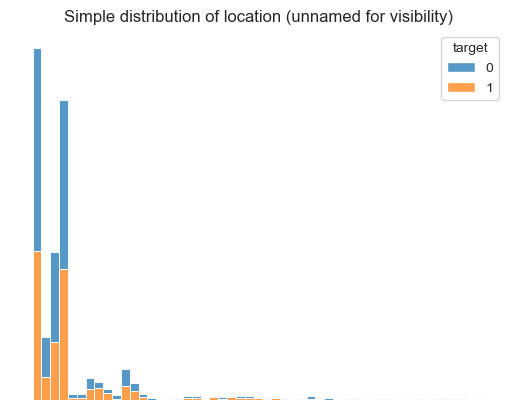

In [75]:
import warnings
warnings.simplefilter("ignore")

plt.title("Simple distribution of location (unnamed for visibility)")
sns.histplot(train_data, x="location", hue="target", multiple="stack")
plt.axis("off")
plt.show()

In [79]:
to_keep = train_data["keyword"].isna()

61

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_v = TfidfVectorizer()
keyword_v = TfidfVectorizer()
loc_v = TfidfVectorizer()

text_tokens = text_v.fit_transform(train_data.loc[:, "text"]).shape
keyword_tokens = keyword_v.fit_transform(train_data.loc[:, "keyword"]).shape
location_tokens = keyword_v.fit_transform(train_data.loc[:, "location"]).shape

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rcf = RandomForestClassifier(max_depth=3, croterion="entropy") 
selector = RFE(rcf, n_features_to_select=5, step=1)